# 기본 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import Binarizer

In [2]:
# 오차행렬 및 평가지표 출력
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


# 임계값 조정
def get_eval_by_threshold(y_test, pred, pred_proba_c1, thresholds):
    pred_proba_c1 = pred_proba_c1.reshape(-1, 1)
    for custom_threshold in thresholds:
        bina = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = bina.transform(pred_proba_c1)
        print('분류 임계값 :', custom_threshold)
        get_clf_eval(y_test, pred, custom_predict)
    

# precision recall curve 그리기
def precision_recall_curve_plot(y_test, pred_proba_c1): 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]

    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [3]:
brfss = pd.read_csv("./data_2/brfss.csv")
checkup = pd.read_csv("./data_2/checkup.csv")

### 데이터 분할

In [4]:
# X = brfss.drop(["HEARTDISEASE"], axis=1)
X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1)
y = brfss["HEARTDISEASE"]

In [5]:
y.value_counts()

0.0    358424
1.0     20222
Name: HEARTDISEASE, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286787
1.0    286787
Name: HEARTDISEASE, dtype: int64

# 할 일
- 하이퍼 파라미터 튜닝
    - 각 모델 document 보면서 찾아보기
- 임계점 변경
    - 변경해보면서 최적값 찾기

# 박민정

## DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정 예시
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7110940579381552
0.6567014393239139
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7696
분류 임계값 : 0.5
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7056
분류 임계값 : 0.55
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7048
분류 임계값 : 0.6
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.6923


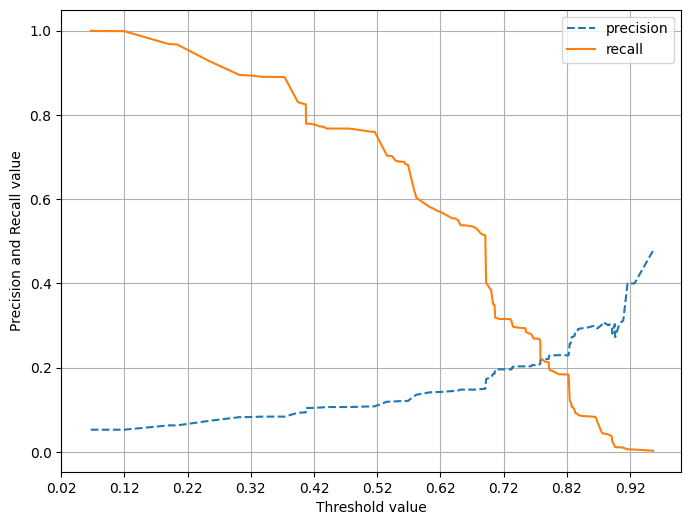

In [31]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## SGDClassifier

In [17]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss", max_iter=10)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7078343826848283
0.6706589198468242
오차 행렬
[[47835 23904]
 [ 1037  2954]]
정확도: 0.6707, 정밀도: 0.1100, 재현율: 0.7402, F1: 0.1915, AUC:0.7691


## SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 서대훈

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-2.8939165652334635

## LightGBM 

In [13]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105471419208189
0.656410933579823
오차 행렬
[[46554 25034]
 [  986  3156]]
정확도: 0.6564, 정밀도: 0.1120, 재현율: 0.7620, F1: 0.1952, AUC:0.7700


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105211755924352
0.6586293410801531
오차 행렬
[[46843 24883]
 [  969  3035]]
정확도: 0.6586, 정밀도: 0.1087, 재현율: 0.7580, F1: 0.1902, AUC:0.7665


# 손지호

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[50422 21270]
 [ 1173  2865]]
정확도: 0.7036, 정밀도: 0.1187, 재현율: 0.7095, F1: 0.2034, AUC:0.7772


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7084812306919853
0.707236233989172
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7764
분류 임계값 : 0.5
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7057
분류 임계값 : 0.55
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7003
분류 임계값 : 0.6
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.6906


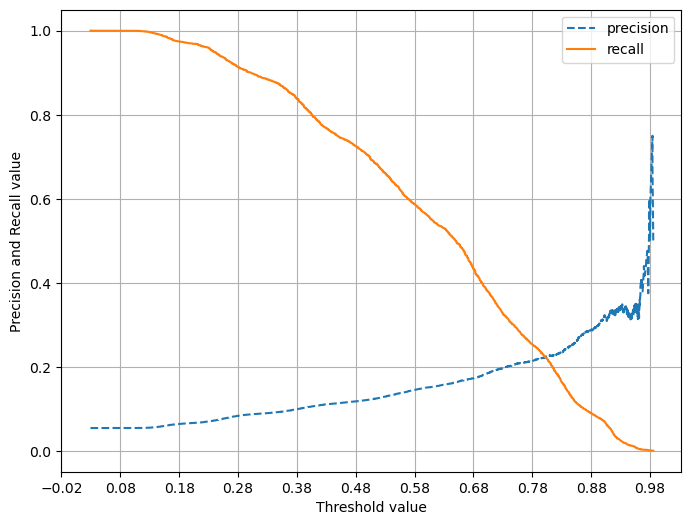

In [28]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.78, 0.8, 0.82]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7084812306919853
0.707236233989172
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.7764
분류 임계값 : 0.78
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.6002
분류 임계값 : 0.8
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.5903
분류 임계값 : 0.82
오차 행렬
[[50670 20956]
 [ 1215  2889]]
정확도: 0.7072, 정밀도: 0.1212, 재현율: 0.7039, F1: 0.2067, AUC:0.5752


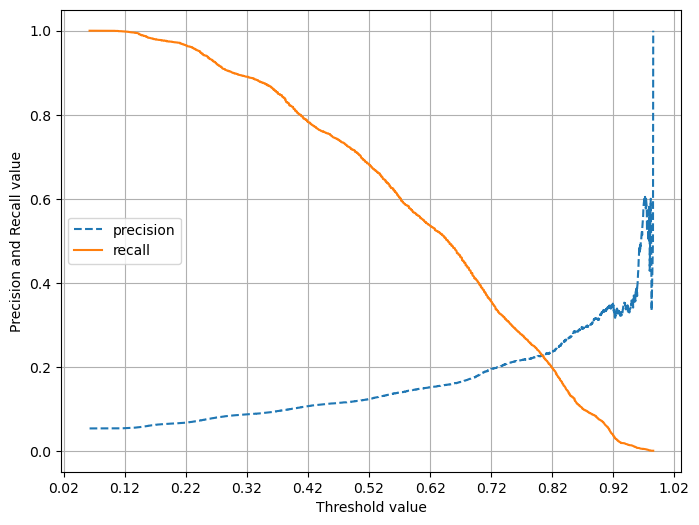

In [21]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## 강의 document
    - 머신러닝_04_1_로지스틱회귀(분류).ipynb

In [65]:
# X = brfss.drop(["HEARTDISEASE"], axis=1)
X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1).to_numpy()
y = brfss["HEARTDISEASE"].to_numpy()

In [66]:
from sklearn.model_selection import train_test_split

#train_input, test_input, train_target, test_target = train_test_split(
#    fish_input, fish_target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train) # 훈련세트의 통계값으로
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test) # 테스트 세트를 반환

In [71]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, y_train)
print(kn.score(train_scaled, y_train))
print(kn.score(test_scaled, y_test))

0.9397818186940109
0.9343664828547886


In [72]:
print(kn.classes_)

[0. 1.]


In [73]:
print(kn.predict(test_scaled[:5]))

[0. 0. 1. 0. 0.]


In [74]:
import numpy as nmp
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.6667 0.3333]
 [1.     0.    ]
 [0.3333 0.6667]
 [1.     0.    ]
 [1.     0.    ]]


In [75]:
distance, indexes = kn.kneighbors(test_scaled[3:4])
print(y_train[indexes])

[[0. 0. 0.]]


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
# 규제를 좀 완화하기 위해 C=20, 충분한 반복 학습을 위해 max_iter=1000
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, y_train)

LogisticRegression(C=20, max_iter=1000)

In [79]:
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.9462610569609555
0.9468318860788912


In [51]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.827 0.173]
 [0.927 0.073]
 [0.812 0.188]
 [0.986 0.014]
 [0.989 0.011]]


In [52]:
data = np.round(proba, decimals=3)
predict_df = pd.DataFrame(data)
predict_df.columns = lr.classes_
predict_df

,0.0,1.0
0,0.827,0.173
1,0.927,0.073
2,0.812,0.188
3,0.986,0.014
4,0.989,0.011


In [53]:
# 각 열에 대한 클래스 명
lr.classes_

array([0., 1.])

In [82]:
print(lr.coef_.shape, lr.intercept_.shape)

(1, 9) (1,)


In [83]:
# 테스트데이터에 대한 z값
decision = lr.decision_function(test_scaled[:9])
print(decision)

[-1.56522536 -2.54760358 -1.46428163 -4.23080525 -4.46713907 -3.99752276
 -3.45966742 -3.33093839 -4.40929886]


In [85]:
from scipy.special import softmax
proba = softmax(decision, axis=0)
print(np.round(proba, decimals=3))

[0.325 0.122 0.36  0.023 0.018 0.029 0.049 0.056 0.019]


## XGBClassifier

In [7]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.764215930771565
0.7545754654694309
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.7264
분류 임계값 : 0.5
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6644
분류 임계값 : 0.55
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6502
분류 임계값 : 0.6
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6324


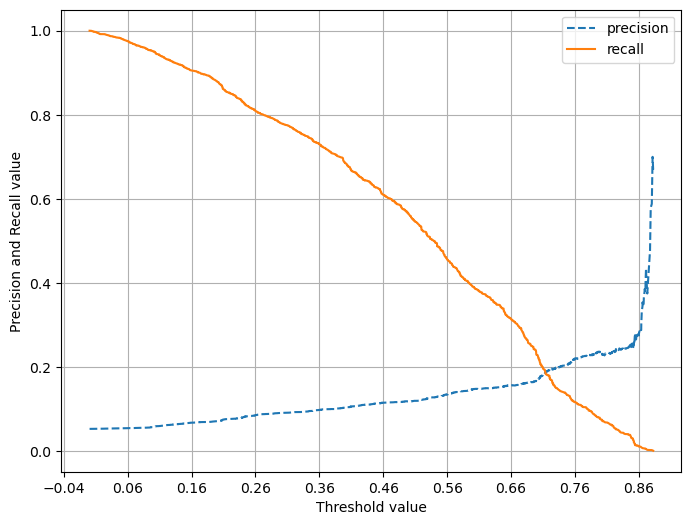

In [8]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [9]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.66, 0.71, 0.76]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.764215930771565
0.7545754654694309
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.7264
분류 임계값 : 0.66
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.6093
분류 임계값 : 0.71
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.5738
분류 임계값 : 0.76
오차 행렬
[[54885 16836]
 [ 1750  2259]]
정확도: 0.7546, 정밀도: 0.1183, 재현율: 0.5635, F1: 0.1956, AUC:0.5467


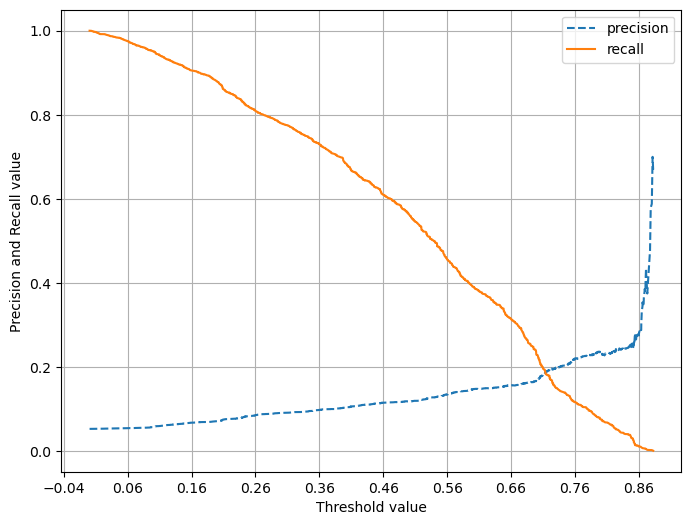

In [10]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## 강의 document
    - 머신러닝_5_3_1_XGBoost(eXtra Gradient Boost) 윗 부분

In [73]:
# 모듈 import
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [74]:
# 데이터 세트 로딩
dataset = brfss
X_features = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1)
y_label = brfss["HEARTDISEASE"]

In [75]:
# 데이터 확인하기 위해 데이터 프레임으로 생성
cancer_df = pd.DataFrame(data=X_features, columns=dataset.columns)
cancer_df['target']= y_label # 맨 마지막에 target 열 추가
cancer_df.head(3)

# target : 0 악성, 1 양성

,HEARTDISEASE,SEX,HEIGHT,WEIGHT,BLIND,DEAF,DIABETE,HYPERTENSION,KIDNEY,ALCOHOL,SMOKE,target
0,NaN,0,145.0,30.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
1,NaN,0,165.0,75.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0
2,NaN,0,160.0,85.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0


In [76]:
# 레이블 값 분포 확인
print(dataset.index)
print(cancer_df['target'].value_counts())

RangeIndex(start=0, stop=378646, step=1)
0.0    358424
1.0     20222
Name: target, dtype: int64


In [77]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286675
1.0    286675
Name: HEARTDISEASE, dtype: int64

In [78]:
# 학습용/테스트용 모두 변환해야 함
#dtrain = xgb.DMatrix(data=X_train, label=y_train,
#                     columns=dataset.columns)
#dtest = xgb.DMatrix(data=X_test, label=y_test,
#                     columns=dataset.columns)
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [79]:
# 파라미터 설정
params = {'max_depth': [3,5],
          'eta':[0.1, 0.2], #learning_rate
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'silent':0,
          'vervosity':0}
# 모델갯수
num_rounds = 400

In [80]:
## train 데이터 셋은 ‘train’ , evaluation 데이터 셋은 ‘eval'로 명기
wlist = [(dtrain,'train'),(dtest,'eval') ] # eval 평가용

In [81]:
# 모델학습
xgb_model = xgb.train(params=params,
                      dtrain=dtrain,
                      num_boost_round=num_rounds,
                      early_stopping_rounds=100,
                      evals=wlist)
# 211이후 100번 더 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료 - 단 311까지 학습을 종료한 모델을 사용
# 211이 best여도 311까지는 학습을 해야 성능을 높일 수 있음

XGBoostError: Invalid Parameter format for learning_rate expect float but value='[0.1, 0.2]'

In [21]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))


predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.267 0.422 0.141 0.204 0.551 0.516 0.134 0.229 0.496 0.259]


In [22]:
# 예측 확률로 예측값이 반환 되므로 임계값을 정해 0또는 1로 변환해야 함
preds = [1 if x>0.5 else 0 for x in pred_probs]
print(np.round(preds[:10]))

[0 0 0 0 1 1 0 0 0 0]


#### XGBoost 모델의 예측 성능 평가

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
# 테스트 레이블 y_test 예측 레이블/예측확률 preds/pred_probs
get_clf_eval(y_test,preds,pred_probs)

오차 행렬
[[54497 17154]
 [ 1671  2408]]
정확도: 0.7514, 정밀도: 0.1231, 재현율: 0.5903,    F1: 0.2037, AUC:0.7437


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

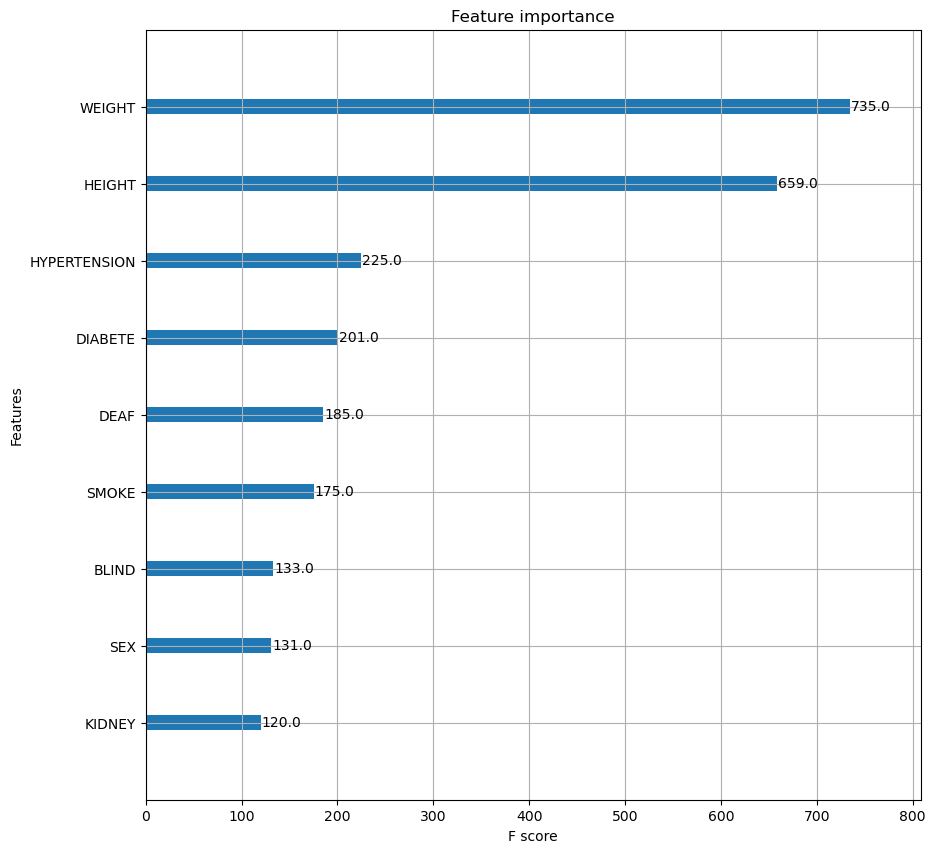

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10)) # 1개의 그래프 공간 생성
plot_importance(xgb_model, ax=ax)

## 강의 document
    - 머신러닝_5_3_1_XGBoost(eXtra Gradient Boost) 아랫 부분
        - 사이킷런 레퍼 XGBoost 클래스인 XGBClassifier 임포트

### early_stopping_rounds = 400

In [26]:
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 400, eval_set = evals, eval_metric = "logloss", verbose = True)
xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.67207
[1]	validation_0-logloss:0.65500
[2]	validation_0-logloss:0.64076
[3]	validation_0-logloss:0.62885
[4]	validation_0-logloss:0.61897
[5]	validation_0-logloss:0.61018
[6]	validation_0-logloss:0.60286
[7]	validation_0-logloss:0.59667
[8]	validation_0-logloss:0.59066
[9]	validation_0-logloss:0.58597
[10]	validation_0-logloss:0.58140
[11]	validation_0-logloss:0.57770
[12]	validation_0-logloss:0.57377
[13]	validation_0-logloss:0.56951
[14]	validation_0-logloss:0.56621
[15]	validation_0-logloss:0.56298
[16]	validation_0-logloss:0.56070
[17]	validation_0-logloss:0.55760
[18]	validation_0-logloss:0.55467
[19]	validation_0-logloss:0.55201
[20]	validation_0-logloss:0.55018
[21]	validation_0-logloss:0.54747
[22]	validation_0-logloss:0.54591
[23]	validation_0-logloss:0.54419
[24]	validation_0-logloss:0.54140
[25]	validation_0-logloss:0.54023
[26]	validation_0-logloss:0.53759
[27]	validation_0-logloss:0.53611
[28]	validation_0-logloss:0.53519
[29]	validation_0-loglos

In [28]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[54497 17154]
 [ 1671  2408]]
정확도: 0.7514, 정밀도: 0.1231, 재현율: 0.5903,    F1: 0.2037, AUC:0.7437


### early_stopping_rounds = 100

In [29]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', \
                eval_set = evals, verbose = True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.67207
[1]	validation_0-logloss:0.65500
[2]	validation_0-logloss:0.64076
[3]	validation_0-logloss:0.62885
[4]	validation_0-logloss:0.61897
[5]	validation_0-logloss:0.61018
[6]	validation_0-logloss:0.60286
[7]	validation_0-logloss:0.59667
[8]	validation_0-logloss:0.59066
[9]	validation_0-logloss:0.58597
[10]	validation_0-logloss:0.58140
[11]	validation_0-logloss:0.57770
[12]	validation_0-logloss:0.57377
[13]	validation_0-logloss:0.56951
[14]	validation_0-logloss:0.56621
[15]	validation_0-logloss:0.56298
[16]	validation_0-logloss:0.56070
[17]	validation_0-logloss:0.55760
[18]	validation_0-logloss:0.55467
[19]	validation_0-logloss:0.55201
[20]	validation_0-logloss:0.55018
[21]	validation_0-logloss:0.54747
[22]	validation_0-logloss:0.54591
[23]	validation_0-logloss:0.54419
[24]	validation_0-logloss:0.54140
[25]	validation_0-logloss:0.54023
[26]	validation_0-logloss:0.53759
[27]	validation_0-logloss:0.53611
[28]	validation_0-logloss:0.53519
[29]	validation_0-loglos

In [30]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[54491 17160]
 [ 1669  2410]]
정확도: 0.7514, 정밀도: 0.1231, 재현율: 0.5908,    F1: 0.2038, AUC:0.7438


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

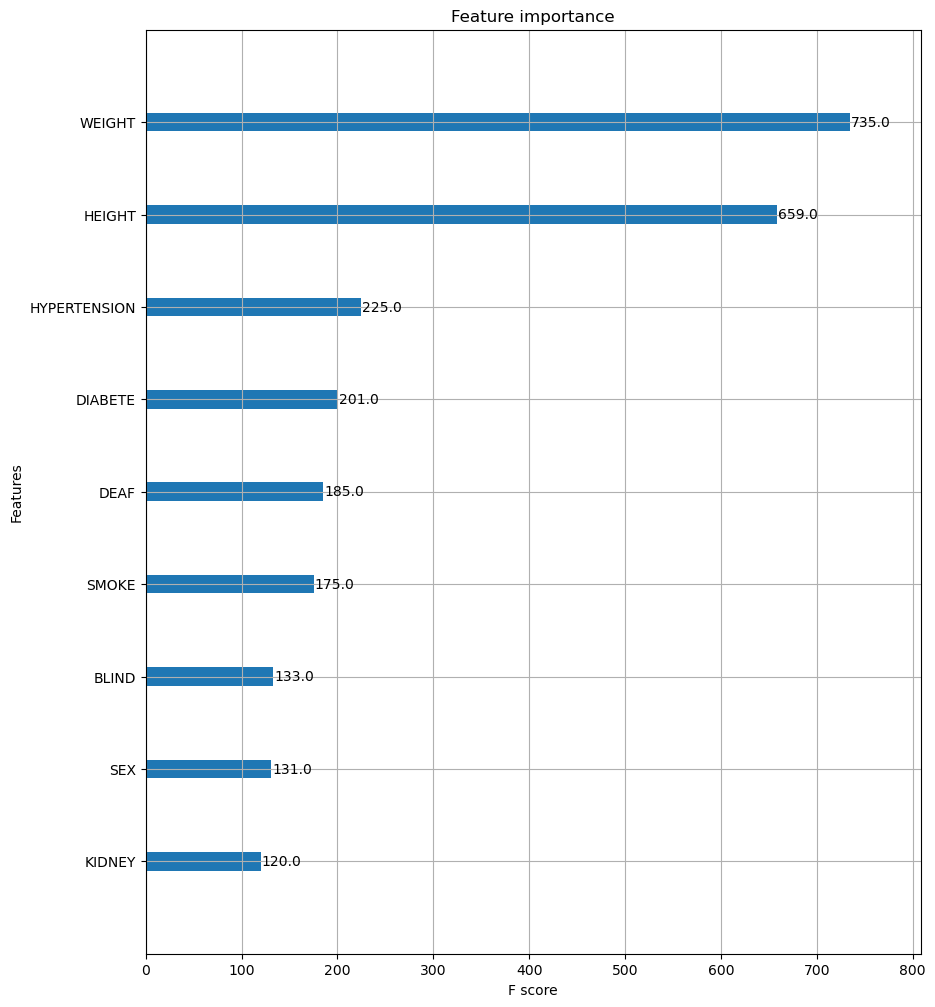

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_wrapper, ax = ax)

## XGBoost 적용
    - https://assaeunji.github.io/machine%20learning/2021-01-07-xgboost/ 참고

In [32]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

오차 행렬
[[54754 16897]
 [ 1745  2334]]
정확도: 0.7538, 정밀도: 0.1214, 재현율: 0.5722,    F1: 0.2003, AUC:0.7334


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

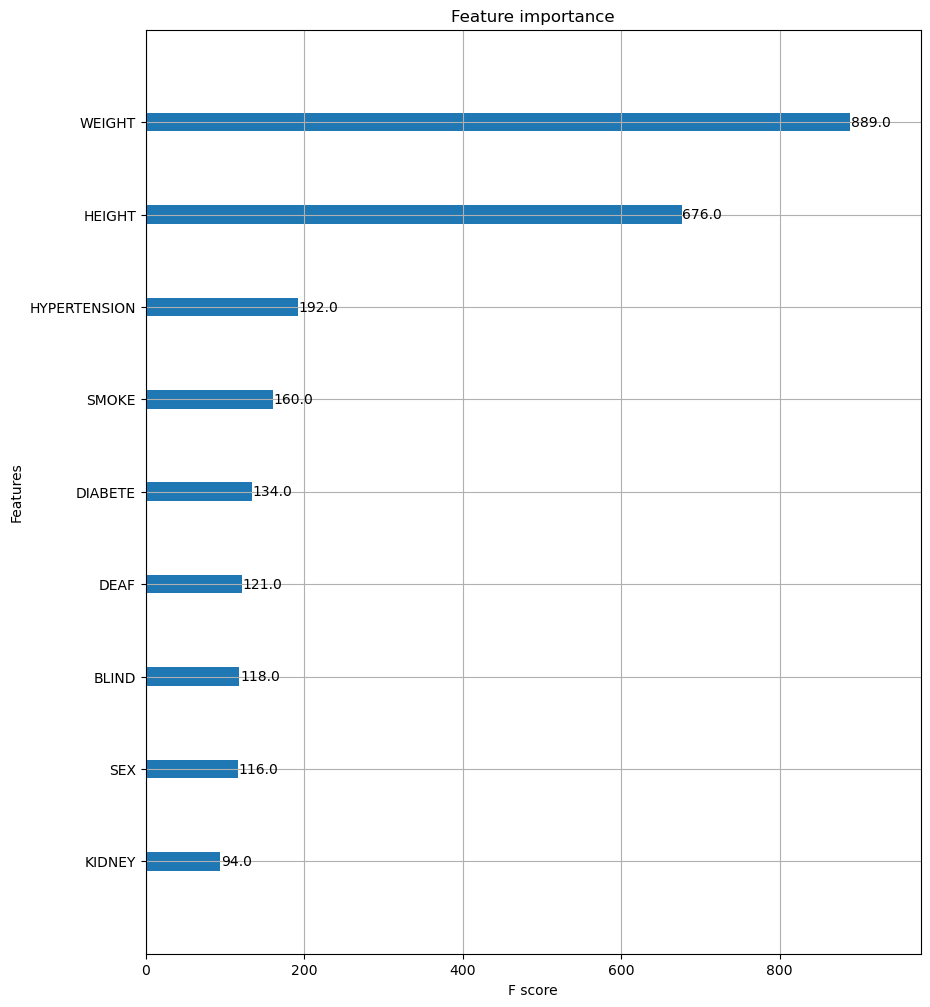

In [33]:
# train
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.3, max_depth = 3)
xgb.fit(X_train, y_train)

# prediction
w_pred = xgb.predict(X_test)
w_pred_proba = xgb.predict_proba(X_test)[:,1]

# confusion matrix
get_clf_eval(y_test, w_pred, w_pred_proba)

# importance plot
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb, ax=ax)

In [34]:
# 학습
xgb = XGBClassifier(n_estimators = 500, random_state = 156)
xgb.fit(X_train, y_train, early_stopping_rounds = 100,
       eval_metric = "auc", eval_set = [(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1],average = 'macro')

print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.7739

[0]	validation_0-auc:0.80482	validation_1-auc:0.76169
[1]	validation_0-auc:0.81070	validation_1-auc:0.76277
[2]	validation_0-auc:0.81537	validation_1-auc:0.76372
[3]	validation_0-auc:0.82052	validation_1-auc:0.76509
[4]	validation_0-auc:0.82189	validation_1-auc:0.76610
[5]	validation_0-auc:0.82684	validation_1-auc:0.76488
[6]	validation_0-auc:0.82903	validation_1-auc:0.76509
[7]	validation_0-auc:0.83163	validation_1-auc:0.76366
[8]	validation_0-auc:0.83468	validation_1-auc:0.76303
[9]	validation_0-auc:0.83610	validation_1-auc:0.76246
[10]	validation_0-auc:0.83750	validation_1-auc:0.76027
[11]	validation_0-auc:0.83838	validation_1-auc:0.75946
[12]	validation_0-auc:0.83918	validation_1-auc:0.75917
[13]	validation_0-auc:0.83963	validation_1-auc:0.75776
[14]	validation_0-auc:0.84022	validation_1-auc:0.75691
[15]	validation_0-auc:0.84098	validation_1-auc:0.75597
[16]	validation_0-auc:0.84144	validation_1-auc:0.75468
[17]	validation_0-auc:0.84179	validation_1-auc:0.75372
[18]	validation_0-au

In [36]:
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.7661


In [37]:
from sklearn.model_selection import GridSearchCV

# Grid Search
xgb = XGBClassifier(n_estimators = 100, random_state = 156)

# 하이퍼파라미터 후보
params = {'max_depth':[5,7]
    , 'min_child_weight':[1,3]
    , 'colsample_bytree':[0.5,0.75]}
# folds = 3
gridcv = GridSearchCV(xgb, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],
    average='macro')

[0]	validation_0-auc:0.70114	validation_1-auc:0.64869
[1]	validation_0-auc:0.81068	validation_1-auc:0.75517
[2]	validation_0-auc:0.81163	validation_1-auc:0.75467
[3]	validation_0-auc:0.81939	validation_1-auc:0.75964
[4]	validation_0-auc:0.81993	validation_1-auc:0.75987
[5]	validation_0-auc:0.82235	validation_1-auc:0.75953
[6]	validation_0-auc:0.82398	validation_1-auc:0.76070
[7]	validation_0-auc:0.82598	validation_1-auc:0.75878
[8]	validation_0-auc:0.82938	validation_1-auc:0.76169
[9]	validation_0-auc:0.83251	validation_1-auc:0.76453
[10]	validation_0-auc:0.83377	validation_1-auc:0.76168
[11]	validation_0-auc:0.83451	validation_1-auc:0.75935
[12]	validation_0-auc:0.83471	validation_1-auc:0.75773
[13]	validation_0-auc:0.83533	validation_1-auc:0.75741
[14]	validation_0-auc:0.83552	validation_1-auc:0.75583
[15]	validation_0-auc:0.83647	validation_1-auc:0.75501
[16]	validation_0-auc:0.83709	validation_1-auc:0.75334
[17]	validation_0-auc:0.83723	validation_1-auc:0.75138
[18]	validation_0-au

In [38]:
print('Optimized hyperparameters', gridcv.best_params_) 
#{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.7731

Optimized hyperparameters {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}
ROC AUC: 0.7645


## XGBRegressor
    - https://github.com/rickiepark/handson-gb/blob/main/Chapter01/Gradient_Boosting_in_Machine_Learning.ipynb 참고

In [45]:
# train_test_split 함수를 임포트합니다.
from sklearn.model_selection import train_test_split

# LinearRegression 클래스를 임포트합니다.
from sklearn.linear_model import LinearRegression

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### 선형회귀모델 만들기

In [46]:
# LinearRegression 모델 객체를 만듭니다.
lin_reg = LinearRegression()

# 훈련 데이터로 lin_reg 객체를 훈련합니다.
lin_reg.fit(X_train, y_train)

# lin_reg 객체를 사용해 X_test에 대한 예측값을 만듭니다.
y_pred = lin_reg.predict(X_test)

# mean_squared_error 함수를 임포트합니다.
from sklearn.metrics import mean_squared_error

# numpy를 임포트합니다.
import numpy as np

# mean_squared_error 함수로 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))

RMSE: 0.22


In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

0.21882651913138443

In [49]:
# XGBRegressor를 임포트합니다.
from xgboost import XGBRegressor

# XGBRegressor의 객체 xg_reg를 만듭니다.
xg_reg = XGBRegressor()

# 훈련 데이터로 xg_reg 객체를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트의 레이블을 예측합니다.
y_pred = xg_reg.predict(X_test)

# 평균 제곱 오차를 계산합니다.
mse = mean_squared_error(y_test, y_pred)

# 평균 제곱근 오차를 계산합니다.
rmse = np.sqrt(mse)

# 평균 제곱근 오차를 출력합니다.
print("RMSE: %0.2f" % (rmse))

RMSE: 0.22


## XGBoost 교차 검증

In [50]:
# cross_val_score 함수를 임포트합니다.
from sklearn.model_selection import cross_val_score

In [51]:
# XGBRegressor 객체를 만듭니다.
model = XGBRegressor(objective="reg:squarederror")

# 10-폴드 교차 검증으로 평균 제곱 오차를 구합니다.
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

# 이 점수의 제곱근을 계산합니다.
rmse = np.sqrt(-scores)

# 평균 제곱근 오차를 출력합니다.
print('회귀 rmse:', np.round(rmse, 2))

# 평균 점수를 출력합니다.
print('RMSE 평균: %0.2f' % (rmse.mean()))

회귀 rmse: [0.21 0.21 0.22 0.22 0.22 0.21 0.23 0.22 0.21 0.22]
RMSE 평균: 0.22


## KNN Classifier

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286693
1.0    286693
Name: HEARTDISEASE, dtype: int64

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.5, 0.55, 0.65]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.6416776830965527
0.9333421365376997
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.6168
분류 임계값 : 0.5
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.5253
분류 임계값 : 0.55
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.5253
분류 임계값 : 0.65
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.5149


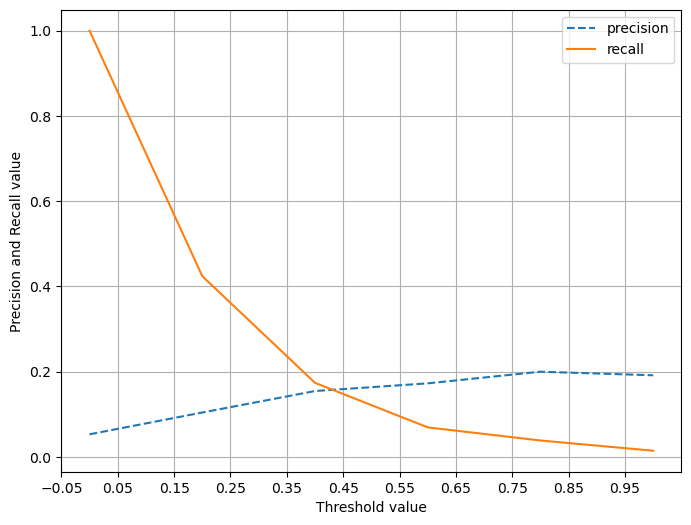

In [9]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정
thresholds = [0.35, 0.40, 0.45]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.6416776830965527
0.9333421365376997
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.6168
분류 임계값 : 0.35
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.5603
분류 임계값 : 0.4
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.5253
분류 임계값 : 0.45
오차 행렬
[[70406  1325]
 [ 3723   276]]
정확도: 0.9333, 정밀도: 0.1724, 재현율: 0.0690, F1: 0.0986, AUC:0.5253


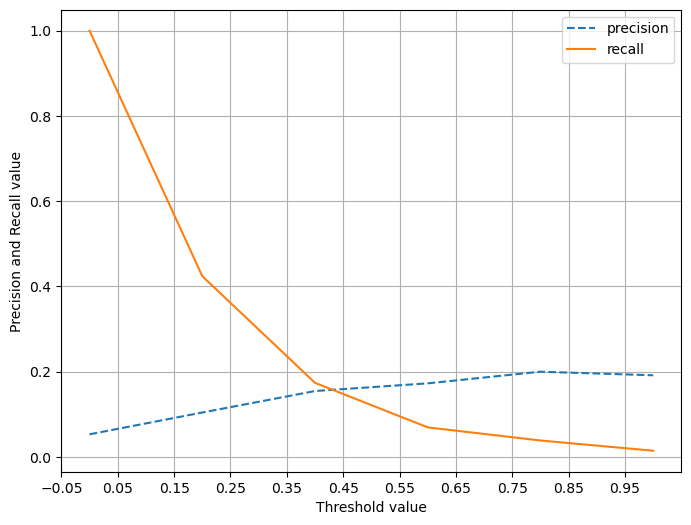

In [12]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## 강의 document
    - 머신러닝_03_1_K-최근접이웃.ipynb

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# scaler
#scaler = StandardScaler()
# scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    268783
1.0    268783
Name: HEARTDISEASE, dtype: int64

In [15]:
print(X_train.shape, X_test.shape)

(537566, 9) (94662, 9)


In [16]:
# shape 속성 - 튜플구조를 반환
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [17]:
# reshape() :  데이터의 차원을 변경하는 함수
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [18]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [19]:
print(X_train.shape, X_test.shape)

(4838094, 1) (851958, 1)


In [24]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [43]:
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
knr.score(X_test, y_test)

-0.11364816821679868

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
# 테스트 세트에 대한 예측을 만듭니다
test_pred = knr.predict(X_test)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, test_pred)
mae

0.0893198960512138

In [47]:
from sklearn.model_selection import train_test_split

In [29]:
#train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
print(X_train.shape, X_test.shape)

(283984, 9) (94662, 9)


In [49]:
# shape 속성 - 튜플구조를 반환
test_array = np.array([1,2,3,4])
test_array.shape[0]

4

In [50]:
# reshape() :  데이터의 차원을 변경하는 함수
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [51]:
train_input = X_train.values.reshape(-1,1)
test_input = X_test.values.reshape(-1,1)

In [52]:
print(train_input.shape, test_input.shape)

(2555856, 1) (851958, 1)


In [53]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [55]:
knr.fit(X_test, y_test) # 회귀모델(KNN)의 기본 평가지표는 R2값임

KNeighborsRegressor()

In [56]:
knr.score(X_test, y_test)

0.04197115715694233

In [57]:
from sklearn.metrics import mean_absolute_error

In [59]:
# 테스트 세트에 대한 예측을 만듭니다
test_pred = knr.predict(X_test)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, test_pred)
mae

0.08170121062305888

- 결과적으로 평균 0.08정도 타깃값과 다르다는 의미

### 과대적합/과소적합

In [61]:
print(knr.score(X_test, y_test))

0.04197115715694233


In [62]:
print(knr.score(X_train, y_train))

-0.09725184614712656


- 테스트 세트의 score가 더 높다
    - 과소적합

In [64]:
# 이웃의 갯수를 40으로 설정합니다
knr.n_neighbors=40
# 모델을 다시 훈련합니다
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))

0.06621329339152882


In [65]:
print(knr.score(X_test, y_test))

0.039738619667967434


- 훈련 세트의 score가 더 높다
    - 과대적합

In [66]:
# 이웃의 갯수를 30으로 설정합니다
knr.n_neighbors=30
# 모델을 다시 훈련합니다
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))

0.06717458506445517


In [67]:
print(knr.score(X_test, y_test))

0.03416481238076563


In [68]:
# 이웃의 갯수를 20으로 설정합니다
knr.n_neighbors=20
# 모델을 다시 훈련합니다
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))

0.06362082068085695


In [69]:
print(knr.score(X_test, y_test))

0.021318345091600355
